<a href="https://colab.research.google.com/github/lizeyujack/bci/blob/main/bci_model_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/train_v2.3.csv')
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
# y1 = to_categorical(y)
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [3]:
def encode_target(y):
    y_encoded = np.zeros( (y.shape[0], 2) )    
    y_neg_index = y == -1
    y_pos_index = y == 1    
    y_encoded[y_neg_index,0] = 1
    y_encoded[y_pos_index,1] = 1
    return y_encoded

In [4]:
y1 = encode_target(y)
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=1)

In [5]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras
from keras.regularizers import l2
import matplotlib.pyplot as plt

model = Sequential()
model.add(Dense(2, input_dim=2998, activation='relu',activity_regularizer=l2(0.001),name='relu_with_regularizer'))
# model.add(Dense(128, input_dim=2998, activation='relu',name='relu_with_regularizer'))
model.add(Dense(256,activation ='relu',name='relu_512'))
model.add(Dropout(0.1,name='dropout1'))
model.add(Dense(512, activation='relu',name='relu_256'))
model.add(Dropout(0.3,name='dropout2'))
model.add(Dense(128, activation='relu',name='relu_128'))
model.add(Dropout(0.2,name='dropout3'))
model.add(Dense(2,activation ='relu',name='tanh_64'))
model.add(Dense(2, activation='softmax',name='softmax'))
model.summary()
optimiser = keras.optimizers.RMSprop(learning_rate=0.00001)
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer=optimiser,metrics=['accuracy'])#, metrics=['accuracy']
# fit the keras model on the dataset
history = model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=50, batch_size=16)
# plot_history(history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
relu_with_regularizer (Dense (None, 2)                 5998      
_________________________________________________________________
relu_512 (Dense)             (None, 256)               768       
_________________________________________________________________
dropout1 (Dropout)           (None, 256)               0         
_________________________________________________________________
relu_256 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout2 (Dropout)           (None, 512)               0         
_________________________________________________________________
relu_128 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout3 (Dropout)           (None, 128)               0

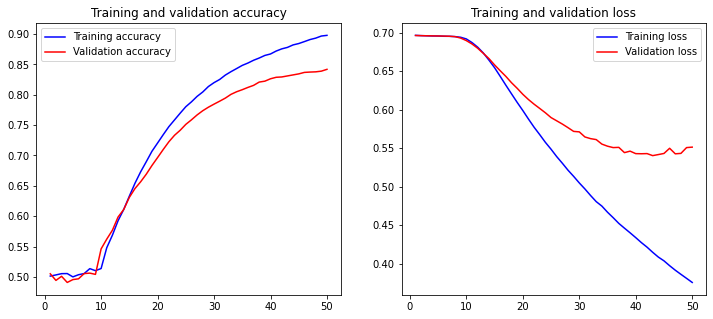

In [6]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(loss) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    # plt.show()
plot_history(history)

In [8]:
from sklearn.metrics import confusion_matrix
# y_pred = model.predict_classes(x_test)
y_pred = np.argmax(model.predict(x_test), axis=-1)
mt = confusion_matrix(y_test[:,0], y_pred)
Predicision = mt[1,1]/(mt[1,1],mt[0,1])
Recall = mt[1,1]/(mt[1,1],mt[1,0])
F1_score = 2*Predicision*Recall/(Predicision+Recall)
print(F1_score)
print(mt)

[1.         0.22340899]
[[ 342 2334]
 [2160  502]]


In [9]:
model.save('/content/drive/MyDrive/train1.h5')